# ML with Logistic Regression

In this notebook, we will use the functions in the file logistic_regression.py. 

In [47]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.costs import *
from functions.proj1_helpers import *
from functions.split import *
from functions.logistic_regression import *
from functions.helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we load the cleaned data

In [75]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
#tX, mean_tX, std_tX = standardize(tX)

We split the data, just to see if we can predict something

In [76]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio)

We plot the graph Loss vs Epochs while doing the Logistic Regression

KeyboardInterrupt: 

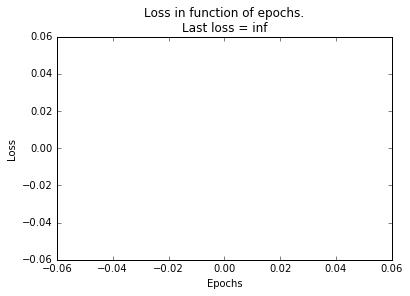

In [77]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.00001

# Initialization
gradient_losses, gradient_ws = logistic_regression(y_train, x_train, 
                                                   gamma, max_iters)